In [1]:
import numpy as np
import pandas as pd

In [2]:
index = [('California',2010),('California',2020),
         ('New York',2010),('New York',2020),
         ('Texas',2010),('Texas',2020)]
population = [37253956, 39097557,
              1987655,2029388,
              25677899,2799007]

pop = pd.Series(population , index=index)
pop

,0
"(California, 2010)",37253956
"(California, 2020)",39097557
"(New York, 2010)",1987655
"(New York, 2020)",2029388
"(Texas, 2010)",25677899
"(Texas, 2020)",2799007


In [3]:
pop[('California', 2020):('Texas', 2020)]

,0
"(California, 2020)",39097557
"(New York, 2010)",1987655
"(New York, 2020)",2029388
"(Texas, 2010)",25677899
"(Texas, 2020)",2799007


In [6]:
pop[[i for i in pop.index if i[1]==2010]]

,0
"(California, 2010)",37253956
"(New York, 2010)",1987655
"(Texas, 2010)",25677899


In [5]:
for i in pop.index:
  print(i[1])

2010
2020
2010
2020
2010
2020


In [7]:
pop [[('California',2010),('Texas',2010),('New York',2010)]]

,0
"(California, 2010)",37253956
"(Texas, 2010)",25677899
"(New York, 2010)",1987655


In [9]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2010),
            ('California', 2020),
            (  'New York', 2010),
            (  'New York', 2020),
            (     'Texas', 2010),
            (     'Texas', 2020)],
           )

In [10]:
pop = pop.reindex(index)
pop

California  2010    37253956
            2020    39097557
New York    2010     1987655
            2020     2029388
Texas       2010    25677899
            2020     2799007
dtype: int64

In [11]:
pop[:,2010]

,0
California,37253956
New York,1987655
Texas,25677899


In [12]:
pop

California  2010    37253956
            2020    39097557
New York    2010     1987655
            2020     2029388
Texas       2010    25677899
            2020     2799007
dtype: int64

In [15]:
pop_df = pop.unstack()
pop_df

,2010,2020
California,37253956,39097557
New York,1987655,2029388
Texas,25677899,2799007


In [17]:
pop_df[2010]

,2010
California,37253956
New York,1987655
Texas,25677899


In [18]:
pop_df.stack()

California  2010    37253956
            2020    39097557
New York    2010     1987655
            2020     2029388
Texas       2010    25677899
            2020     2799007
dtype: int64

In [19]:
pop_df = pd.DataFrame({'total':pop,
                       'under18':[9245678,8898765,
                                  4356778,413456,
                                  6890987,7456789]})
pop_df

total  under18
California 2010  37253956  9245678
           2020  39097557  8898765
New York   2010   1987655  4356778
           2020   2029388   413456
Texas      2010  25677899  6890987
           2020   2799007  7456789

In [21]:
fu18 = pop_df['under18']/pop_df['total']
fu18.unstack()

,2010,2020
California,0.248180,0.227604
New York,2.191919,0.203734
Texas,0.268363,2.664084


In [22]:
df = pd.DataFrame(np.random.rand(4,2),
                  index =[['a','a','b','b'],[1,2,1,2]],
                  columns=['data1','data2'])

df

data1     data2
a 1  0.446034  0.751310
  2  0.525619  0.139879
b 1  0.233031  0.280858
  2  0.613423  0.223821

In [23]:
pd.MultiIndex.from_arrays([['a','a','b','b'],[1,2,1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [24]:
pd.MultiIndex.from_product([['a','b'],[1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [25]:
pop

California  2010    37253956
            2020    39097557
New York    2010     1987655
            2020     2029388
Texas       2010    25677899
            2020     2799007
dtype: int64

In [26]:
pop.index.names = ['state','year']
pop

state       year
California  2010    37253956
            2020    39097557
New York    2010     1987655
            2020     2029388
Texas       2010    25677899
            2020     2799007
dtype: int64

In [29]:
index = pd.MultiIndex.from_product([[2013,2014],[1,2]],names=['year','#visit'])
columns = pd.MultiIndex.from_product([['Bob','Guido','Sue'],['HR','Temp']], names=['subject','type'])

data = np.round(np.random.randn(4,6),1)
data[:,::2]*=10
data +=37


healthData = pd.DataFrame(data, index=index, columns=columns)

In [30]:
healthData

subject       Bob       Guido         Sue      
type           HR  Temp    HR  Temp    HR  Temp
year #visit                                    
2013 1       41.0  36.0  43.0  38.9  32.0  37.0
     2       30.0  35.1  31.0  35.9  25.0  35.9
2014 1       35.0  36.9  31.0  35.9  38.0  36.4
     2       30.0  39.6  39.0  36.9  39.0  36.7

In [31]:
healthData['Guido']

type           HR  Temp
year #visit            
2013 1       43.0  38.9
     2       31.0  35.9
2014 1       31.0  35.9
     2       39.0  36.9

In [33]:
healthData['Guido','HR'][2013]

,Guido
,HR
#visit,
1,43.0
2,31.0


In [34]:
pop

state       year
California  2010    37253956
            2020    39097557
New York    2010     1987655
            2020     2029388
Texas       2010    25677899
            2020     2799007
dtype: int64

In [35]:
popflat = pop.reset_index(name='population')

In [36]:
popflat

,state,year,population
0,California,2010,37253956
1,California,2020,39097557
2,New York,2010,1987655
3,New York,2020,2029388
4,Texas,2010,25677899
5,Texas,2020,2799007


In [37]:
popflat.set_index(['state','year'])

population
state      year            
California 2010    37253956
           2020    39097557
New York   2010     1987655
           2020     2029388
Texas      2010    25677899
           2020     2799007

In [38]:
x = [1,2,3]
y = [4,5,6]
z = [7,8,9]
np.concatenate([x,y,z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
x=[[1,2],
 [3,4]]

In [40]:
np.concatenate([x,x],axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [41]:
ser1 = pd.Series(['A','B','C'],index=[1,2,3])
ser2 = pd.Series(['D','E','F'], index=[4,5,6])
pd.concat([ser1,ser2])

,0
1,A
2,B
3,C
4,D
5,E
6,F


In [42]:
df1 = pd.DataFrame([['A1','B1'],['A2','B2']], columns = ['A','B'],index=[1,2])
df2 = pd.DataFrame([['A3','B3'],['A4','B4']], columns = ['A','B'],index=[3,4])
pd.concat([df1,df2],axis=0)

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [43]:
df1 = pd.DataFrame([['A1','B1'],['A2','B2']], columns = ['A','B'],index=[1,2])
df2 = pd.DataFrame([['A3','B3'],['A4','B4']], columns = ['A','B'],index=[1,2])
pd.concat([df1,df2],axis=0)

,A,B
1,A1,B1
2,A2,B2
1,A3,B3
2,A4,B4


In [44]:
df1 = pd.DataFrame([['A1','B1'],['A2','B2']], columns = ['A','B'],index=[1,2])
df2 = pd.DataFrame([['A3','B3'],['A4','B4']], columns = ['A','B'],index=[1,2])
pd.concat([df1,df2],axis=0, verify_integrity=True)

ValueError: Indexes have overlapping values: Index([1, 2], dtype='int64')

In [45]:
df1 = pd.DataFrame([['A1','B1'],['A2','B2']], columns = ['A','B'],index=[1,2])
df2 = pd.DataFrame([['A3','B3'],['A4','B4']], columns = ['A','B'],index=[1,2])
pd.concat([df1,df2],axis=0, ignore_index=True)

,A,B
0,A1,B1
1,A2,B2
2,A3,B3
3,A4,B4


In [47]:
pd.concat([df1,df2],axis=0).reset_index().drop('index',axis=1)

,A,B
0,A1,B1
1,A2,B2
2,A3,B3
3,A4,B4


In [48]:
pd.concat([df1,df2],keys=['x','y'])

A   B
x 1  A1  B1
  2  A2  B2
y 1  A3  B3
  2  A4  B4

In [51]:
df1 = pd.DataFrame([['A1','B1','C1'],['A2','B2','C2']], columns = ['A','B','C'],index=[1,2])
df2 = pd.DataFrame([['B3','C3','D3'],['B4','C4','D4']], columns = ['B','C','D'],index=[3,4])
df1

,A,B,C
1,A1,B1,C1
2,A2,B2,C2


In [52]:
df2

,B,C,D
3,B3,C3,D3
4,B4,C4,D4


In [53]:
pd.concat([df1,df2],axis=0)

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [55]:
pd.concat([df1,df2],axis=0, join='left')

ValueError: Only can inner (intersect) or outer (union) join the other axis

In [56]:
df1 = pd.DataFrame({'employee':['Bob','Jake','Lisa','Sue'],
                    'group':['Accounting','Engineering','Engineering','HR']})

df2 = pd.DataFrame({'employee':['Lisa','Sue','Bob','Jake'],
                    'hire_date':[2004,2008,2012,2014]})

df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [57]:
df2

,employee,hire_date
0,Lisa,2004
1,Sue,2008
2,Bob,2012
3,Jake,2014


In [59]:
df3 = pd.merge(df1,df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2012
1,Jake,Engineering,2014
2,Lisa,Engineering,2004
3,Sue,HR,2008


In [60]:
df4 = pd.DataFrame({'group':['Accounting','Engineering','HR'],
                    'supervisor':['Carly','Guido','Steve']})
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [61]:
df3

,employee,group,hire_date
0,Bob,Accounting,2012
1,Jake,Engineering,2014
2,Lisa,Engineering,2004
3,Sue,HR,2008


In [62]:
pd.merge(df3,df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2012,Carly
1,Jake,Engineering,2014,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2008,Steve


In [65]:
df5 = pd.DataFrame({'group':['Accounting','Accounting',
                             'Engineering','Engineering',
                             'HR','HR'],
                    'skills':['math','spreadsheets','software','math','spreadsheets','organization']})
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,software
3,Engineering,math
4,HR,spreadsheets
5,HR,organization


In [66]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [68]:
pd.merge(df1,df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,software
3,Jake,Engineering,math
4,Lisa,Engineering,software
5,Lisa,Engineering,math
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [69]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [70]:
df2

,employee,hire_date
0,Lisa,2004
1,Sue,2008
2,Bob,2012
3,Jake,2014


In [71]:
pd.merge(df1,df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2012
1,Jake,Engineering,2014
2,Lisa,Engineering,2004
3,Sue,HR,2008


In [72]:
df6 = pd.DataFrame({'name':['Bob','Jake','Lisa','Sue'],
                    'Salary':[7000,8000,6000,5000]})
df6

,name,Salary
0,Bob,7000
1,Jake,8000
2,Lisa,6000
3,Sue,5000


In [73]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [75]:
pd.merge(df1,df6,left_on='employee',right_on='name').drop('name',axis=1)

,employee,group,Salary
0,Bob,Accounting,7000
1,Jake,Engineering,8000
2,Lisa,Engineering,6000
3,Sue,HR,5000


In [76]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [77]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
df1a

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


In [78]:
df2a

,hire_date
employee,
Lisa,2004
Sue,2008
Bob,2012
Jake,2014


In [79]:
pd.merge(df1a,df2a,right_index=True,left_index=True)

,group,hire_date
employee,,
Bob,Accounting,2012
Jake,Engineering,2014
Lisa,Engineering,2004
Sue,HR,2008


In [80]:
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2012
Jake,Engineering,2014
Lisa,Engineering,2004
Sue,HR,2008


In [81]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [82]:
df2a

,hire_date
employee,
Lisa,2004
Sue,2008
Bob,2012
Jake,2014


In [84]:
pd.merge(df1,df2a,left_on='employee',right_index=True)

,employee,group,hire_date
0,Bob,Accounting,2012
1,Jake,Engineering,2014
2,Lisa,Engineering,2004
3,Sue,HR,2008


In [85]:
df7 = pd.DataFrame({'name':['Peter','Paul','Mary'],
                    'food':['fish','beans','bread']})

df8 = pd.DataFrame({'name':['Mary','Joseph'],
                    'drinks':['milk','water']})
df7

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


In [86]:
df8

,name,drinks
0,Mary,milk
1,Joseph,water


In [87]:
pd.merge(df7,df8)

,name,food,drinks
0,Mary,bread,milk


In [88]:
pd.merge(df7,df8,how='inner')

,name,food,drinks
0,Mary,bread,milk


In [89]:
pd.merge(df7,df8,how='outer')

,name,food,drinks
0,Joseph,NaN,water
1,Mary,bread,milk
2,Paul,beans,NaN
3,Peter,fish,NaN


In [90]:
pd.merge(df7,df8,how='left')

,name,food,drinks
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,milk


In [91]:
pd.merge(df7,df8,how='right')

,name,food,drinks
0,Mary,bread,milk
1,Joseph,NaN,water


In [92]:
df9 = pd.DataFrame({'name':['Bob','Lisa','Jake','Sue'],
                    'rank':[1,2,3,4]})

df10 = pd.DataFrame({'name':['Jake','Bob','Lisa','Sue'],
                    'rank':[3,2,1,4]})

pd.merge(df9,df10,on='name')

,name,rank_x,rank_y
0,Bob,1,2
1,Lisa,2,1
2,Jake,3,3
3,Sue,4,4


In [93]:

pd.merge(df9,df10,on='name',suffixes=['_L','_R'])

,name,rank_L,rank_R
0,Bob,1,2
1,Lisa,2,1
2,Jake,3,3
3,Sue,4,4


In [94]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

In [95]:
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [96]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [97]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [100]:
merged = pd.merge(pop,abbrevs, how='outer', left_on='state/region',right_on='abbreviation')
merged = merged.drop('abbreviation',axis=1)
merged.head()


,state/region,ages,year,population,state
0,AK,total,1990,553290.0,Alaska
1,AK,under18,1990,177502.0,Alaska
2,AK,total,1992,588736.0,Alaska
3,AK,under18,1991,182180.0,Alaska
4,AK,under18,1992,184878.0,Alaska


In [102]:
merged.isnull().any()

,0
state/region,False
ages,False
year,False
population,True
state,True


In [103]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
1872,PR,under18,1990,NaN,NaN
1873,PR,total,1990,NaN,NaN
1874,PR,total,1991,NaN,NaN
1875,PR,under18,1991,NaN,NaN
1876,PR,total,1993,NaN,NaN


In [107]:
np.count_nonzero(merged['population'].isnull() & (merged['state/region'] == 'PR'))

20

In [108]:
(merged[merged['state/region'] == 'PR'])

,state/region,ages,year,population,state
1872,PR,under18,1990,NaN,NaN
1873,PR,total,1990,NaN,NaN
1874,PR,total,1991,NaN,NaN
1875,PR,under18,1991,NaN,NaN
1876,PR,total,1993,NaN,NaN
1877,PR,under18,1993,NaN,NaN
1878,PR,under18,1992,NaN,NaN
1879,PR,total,1992,NaN,NaN
1880,PR,under18,1994,NaN,NaN
1881,PR,total,1994,NaN,NaN


In [111]:
merged[merged['state'].isnull()]['state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [115]:
merged.loc[merged['state/region']=='PR','state']='Puerto Rico'
merged.loc[merged['state/region']=='USA','state']='United States'
merged.isnull().any()

,0
state/region,False
ages,False
year,False
population,True
state,False


In [117]:
merged.head()

,state/region,ages,year,population,state
0,AK,total,1990,553290.0,Alaska
1,AK,under18,1990,177502.0,Alaska
2,AK,total,1992,588736.0,Alaska
3,AK,under18,1991,182180.0,Alaska
4,AK,under18,1992,184878.0,Alaska


In [118]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [119]:
final = pd.merge(merged, areas, on='state', how= 'left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AK,total,1990,553290.0,Alaska,656425.0
1,AK,under18,1990,177502.0,Alaska,656425.0
2,AK,total,1992,588736.0,Alaska,656425.0
3,AK,under18,1991,182180.0,Alaska,656425.0
4,AK,under18,1992,184878.0,Alaska,656425.0


In [121]:
final.isnull().any()

,0
state/region,False
ages,False
year,False
population,True
state,False
area (sq. mi),True


In [123]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [124]:
areas['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
       'District of Columbia', 'Puerto Rico'], dtype=object)

In [125]:
areas['area (sq. mi)'].sum()

np.int64(3790399)

In [ ]:
final[final['state']=='United States']['area (sq. mi)']=areas['area (sq. mi)'].sum()

In [ ]:
final[final['state']=='United States']['area (sq. mi)']=[final.notnull()]['area (sq. mi)']final['area (sq. mi)'].sum()

In [126]:
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AK,total,1990,553290.0,Alaska,656425.0
1,AK,under18,1990,177502.0,Alaska,656425.0
2,AK,total,1992,588736.0,Alaska,656425.0
3,AK,under18,1991,182180.0,Alaska,656425.0
4,AK,under18,1992,184878.0,Alaska,656425.0


In [127]:
final.dropna(inplace=True)

In [128]:
final.isnull().any()

,0
state/region,False
ages,False
year,False
population,False
state,False
area (sq. mi),False


In [132]:
row2010 = final[(final['ages']=='total') & (final['year']==2010)]
row2010.head()

,state/region,ages,year,population,state,area (sq. mi)
43,AK,total,2010,713868.0,Alaska,656425.0
51,AL,total,2010,4785570.0,Alabama,52423.0
141,AR,total,2010,2922280.0,Arkansas,53182.0
149,AZ,total,2010,6408790.0,Arizona,114006.0
197,CA,total,2010,37333601.0,California,163707.0


In [133]:
row2010.columns

Index(['state/region', 'ages', 'year', 'population', 'state', 'area (sq. mi)'], dtype='object')

In [134]:
row2010['density'] = row2010['population']/row2010['area (sq. mi)']
row2010.head()

/tmp/ipython-input-134-1779726586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row2010['density'] = row2010['population']/row2010['area (sq. mi)']


,state/region,ages,year,population,state,area (sq. mi),density
43,AK,total,2010,713868.0,Alaska,656425.0,1.087509
51,AL,total,2010,4785570.0,Alabama,52423.0,91.287603
141,AR,total,2010,2922280.0,Arkansas,53182.0,54.948667
149,AZ,total,2010,6408790.0,Arizona,114006.0,56.214497
197,CA,total,2010,37333601.0,California,163707.0,228.051342


In [137]:
row2010.set_index('state',inplace=True)

In [141]:
density = row2010['density']
density.head()

,density
state,
Alaska,1.087509
Alabama,91.287603
Arkansas,54.948667
Arizona,56.214497
California,228.051342


In [143]:
dd = density.sort_values(ascending=False)
dd.head()

,density
state,
District of Columbia,8898.897059
Puerto Rico,1058.665149
New Jersey,1009.253268
Rhode Island,681.339159
Connecticut,645.600649


In [144]:
dd.tail()

,density
state,
South Dakota,10.583512
North Dakota,9.537565
Montana,6.736171
Wyoming,5.768079
Alaska,1.087509


In [147]:
rng = np.random.default_rng(seed=42)
ser = pd.Series(rng.random(5))
ser

,0
0,0.773956
1,0.438878
2,0.858598
3,0.697368
4,0.094177


In [148]:
ser.sum()

np.float64(2.8629777851664118)

In [149]:
ser.mean()

np.float64(0.5725955570332824)

In [150]:
df = pd.DataFrame({'A':rng.random(5),
                   'B':rng.random(5)})
df

,A,B
0,0.975622,0.370798
1,0.761140,0.926765
2,0.786064,0.643865
3,0.128114,0.822762
4,0.450386,0.443414


In [151]:
df.mean()

,0
A,0.620265
B,0.641521


In [152]:
df.mean(axis=1)

,0
0,0.673210
1,0.843952
2,0.714965
3,0.475438
4,0.446900


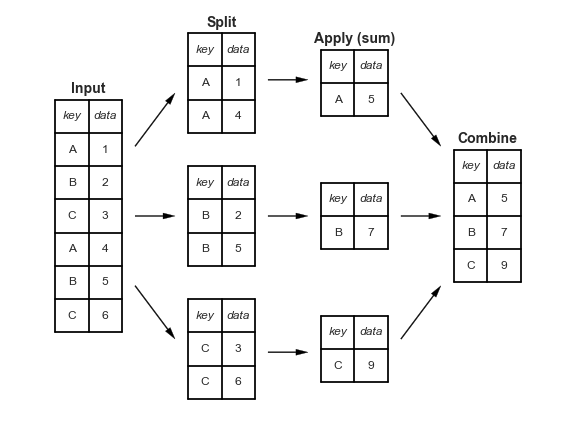

In [153]:
from IPython.display import Image
Image('03.08-split-apply-combine.png')

In [154]:
df = pd.DataFrame({'key':['A','B','C','A','B','C'],
                   'data':range(6)})
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [155]:
df.groupby('key')

In [157]:
for x in df.groupby('key'):
  print(pd.DataFrame(x))

                                     0
0                                    A
1    key  data
0   A     0
3   A     3
                                     0
0                                    B
1    key  data
1   B     1
4   B     4
                                     0
0                                    C
1    key  data
2   C     2
5   C     5


In [158]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [159]:
df = pd.DataFrame({'key':list('ABCABC'),
                   'data1':range(6),
                   'data2':range(10,16)})
df

,key,data1,data2
0,A,0,10
1,B,1,11
2,C,2,12
3,A,3,13
4,B,4,14
5,C,5,15


In [161]:
df.groupby('key').sum()

,data1,data2
key,,
A,3,23
B,5,25
C,7,27


In [162]:
df.groupby('key').aggregate(['min', np.median, max])

/tmp/ipython-input-162-968873422.py:1: FutureWarning: The provided callable <function median at 0x7bda3d62b600> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('key').aggregate(['min', np.median, max])
/tmp/ipython-input-162-968873422.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('key').aggregate(['min', np.median, max])


data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3    10   11.5  13
B       1    2.5   4    11   12.5  14
C       2    3.5   5    12   13.5  15

In [163]:
df.groupby('key')['data1'].sum()

,data1
key,
A,3
B,5
C,7


In [164]:
df.groupby('key')['data2'].min()

,data2
key,
A,10
B,11
C,12


In [165]:
df.groupby('key').aggregate({'data1':'sum',
                             'data2':'min'})

,data1,data2
key,,
A,3,10
B,5,11
C,7,12


In [166]:
df

,key,data1,data2
0,A,0,10
1,B,1,11
2,C,2,12
3,A,3,13
4,B,4,14
5,C,5,15


In [169]:
df.groupby('key')['data1'].sum()

,data1
key,
A,3
B,5
C,7


In [168]:
def filtersum(x):
  return x['data1'].sum()>3

df.groupby('key').filter(filtersum)

,key,data1,data2
1,B,1,11
2,C,2,12
4,B,4,14
5,C,5,15


In [170]:
21/6

3.5

In [172]:
def center(x):
  return x + (0.1*x.mean())

df.groupby('key').transform(center)

,data1,data2
0,0.15,11.15
1,1.25,12.25
2,2.35,13.35
3,3.15,14.15
4,4.25,15.25
5,5.35,16.35


In [173]:
df

,key,data1,data2
0,A,0,10
1,B,1,11
2,C,2,12
3,A,3,13
4,B,4,14
5,C,5,15


In [174]:
L = [0,1,0,1,2,0]
df.groupby(L).sum()

,key,data1,data2
0,ACC,7,37
1,BA,4,24
2,B,4,14


In [176]:
df['L'] = L
df

,key,data1,data2,L
0,A,0,10,0
1,B,1,11,1
2,C,2,12,0
3,A,3,13,1
4,B,4,14,2
5,C,5,15,0


In [177]:
df.groupby('L').sum()

,key,data1,data2
L,,,
0,ACC,7,37
1,BA,4,24
2,B,4,14


In [180]:
df.drop('L',axis=1,inplace=True)

In [179]:
df

,key,data1,data2,L
0,A,0,10,0
1,B,1,11,1
2,C,2,12,0
3,A,3,13,1
4,B,4,14,2
5,C,5,15,0


In [181]:
df2 = df.set_index('key')
df2

,data1,data2
key,,
A,0,10
B,1,11
C,2,12
A,3,13
B,4,14
C,5,15


In [183]:
mapping = {'A':'vowel', 'B':'consonant','C':'consonant'}
df2.groupby(mapping).sum()

,data1,data2
key,,
consonant,12,52
vowel,3,23


In [185]:
df2.groupby(str.lower).sum()

,data1,data2
key,,
a,3,23
b,5,25
c,7,27


In [184]:
df = pd.DataFrame({'key':list('ABCaBC'),
                   'data1':range(6),
                   'data2':range(10,16)})
df.groupby('key').sum()

,data1,data2
key,,
A,0,10
B,5,25
C,7,27
a,3,13


In [186]:
df['L'] = L

In [187]:
df

,key,data1,data2,L
0,A,0,10,0
1,B,1,11,1
2,C,2,12,0
3,a,3,13,1
4,B,4,14,2
5,C,5,15,0


In [188]:
df.groupby(['key','L']).sum()

data1  data2
key L              
A   0      0     10
B   1      1     11
    2      4     14
C   0      7     27
a   1      3     13

In [191]:
df2.groupby([mapping,str.lower]).sum()

data1  data2
key       key              
consonant b        5     25
          c        7     27
vowel     a        3     23